In [ ]:
!pip install --upgrade huggingface_hub datasets
!pip install datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.5
    Uninstalling huggingface-hub-0.33.5:
      Successfully uninstalled huggingface-hub-0.33.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 34.3 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
import datasets

In [ ]:
import os

In [ ]:
from datasets import load_dataset

In [ ]:
import os
from huggingface_hub import login

# Option 1: store token as an environment variable
os.environ["HF_TOKEN"] = ""

# Option 2: then use it
login(token=os.environ["HF_TOKEN"])

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [ ]:
yoruba_dat = load_dataset("mozilla-foundation/common_voice_17_0","yo",split = "train", token = True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

common_voice_17_0.py:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/132k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

yo_train_0.tar:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

yo_dev_0.tar:   0%|          | 0.00/28.2M [00:00<?, ?B/s]

yo_test_0.tar:   0%|          | 0.00/37.8M [00:00<?, ?B/s]

yo_other_0.tar:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

yo_invalidated_0.tar:   0%|          | 0.00/8.90M [00:00<?, ?B/s]

yo_validated_0.tar:   0%|          | 0.00/111M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/406k [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/298k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/328k [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/374k [00:00<?, ?B/s]

invalidated.tsv:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

validated.tsv:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1213it [00:00, 70608.43it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 863it [00:00, 68993.68it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 999it [00:00, 110914.02it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1113it [00:00, 89971.48it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 229it [00:00, 28870.59it/s]


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3077it [00:00, 75177.07it/s]


In [ ]:
yoruba_upvotes = yoruba_dat["up_votes"]
yoruba_downvotes = yoruba_dat["down_votes"]

In [ ]:
import matplotlib.pyplot as plt

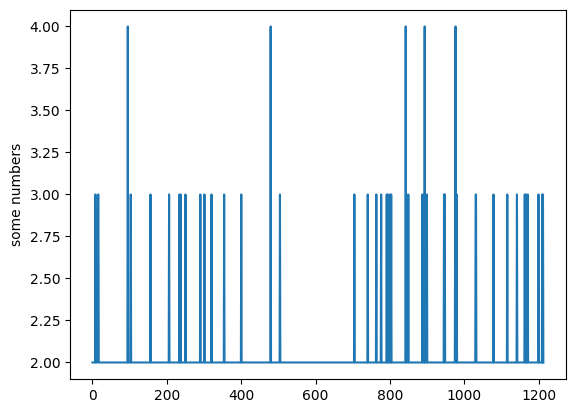

In [ ]:
plt.plot(yoruba_upvotes)
plt.ylabel('some numbers')
plt.show()

In [ ]:
!pip install epitran

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 8.6 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10744 sha256=347d57f3d4e149bdeb7a0b23e88f0e7eaa4f4f1fab77e18192dcc95fc379bf37
  Stored in directory: /root/.cache/pip/wheels/ec/03/6f/d2e0162d94c0d451556fa43dd4d5531457245c34a36b41ef4a
Successfully built unicodecsv


In [ ]:
import epitran

In [ ]:
epi = epitran.Epitran('yor-Latn')
text = 'Ẹ kú àárọ̀'
ipa = epi.transliterate(text)

print(ipa)

ɛ kú àárɔ̀


In [ ]:
sentences_test = yoruba_dat["sentence"]

In [ ]:
for i in sentences_test[0:10]:
  print(i)
  print(epi.transliterate(i))

Ọmọ ẹgbẹ́ òkùnkùn dèrò àtìmọ́lé torí nílùú Ìbàdàn.
ɔmɔ ɛɡ͡bɛ́ òkùnkùn dèrò àtìmɔ́lé torí nílùú ìbàdàn.
Ìyàwó àwọn ọlọ́pàá tó kú lásìkò ìwọ́de tó kọjá ti bẹ̀bẹ̀ fún ìrànwọ́
ìjàwó àwɔ̃ ɔlɔ́k͡pàá tó kú lásìkò ìwɔ́de tó kɔd͡ʒá ti bɛ̀bɛ̀ fún ìrànwɔ́
Nítori ọrọ táa sọ lọ́jọ́sí ni Túndé yoo fi kúrò nílé ìwé.
nítori ɔrɔ táa sɔ lɔ́d͡ʒɔ́sí ni túndé joo fi kúrò nílé ìwé.
Ilẹ̀ mímìtìtì ní ìlú ṣakí ti sọ àwọn olugbé ibẹ̀ sínú hílàhílo
ilɛ̀ mímìtìtì ní ìlú ʃakí ti sɔ àwɔ̃ oluɡ͡bé ibɛ̀ sínú hílàhílo
Ìgbòho ní Aláàfin, Ọ̀ọ̀nì, Olúbàdàn tì òun lẹ́yìn.
ìɡ͡bòho ní aláàfĩ, ɔ̀ɔ̀nì, olúbàdàn tì òũ lɛ́jìn.
Àfáà ń wáàsù kí àwọn alátìlẹ́yìn rẹ̀ má gba abẹ́rẹ́ àjẹ́sára.
àfáà ń wáàsù kí àwɔ̃ alátìlɛ́jìn rɛ̀ má ɡ͡ba abɛ́rɛ́ àd͡ʒɛ́sára.
Awọn gómìnà kankan ti padà sí ẹgbẹ́ òṣèlú onígbàálẹ̀.
awɔ̃ ɡómìnà kankan ti k͡padà sí ɛɡ͡bɛ́ òʃèlú oníɡ͡bàálɛ̀.
Ọ̀pọ̀ ènìyàn ló fẹ́ kúrò nílè Nàíjíríà.
ɔ̀k͡pɔ̀ ènìjàn ló fɛ́ kúrò nílè nàíd͡ʒíríà.
Ọba ìlú wa kìlọ̀ fún áwọn ọ̀dọ́ lórí ṣíṣe òògùn owó ò